<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayesian Statistics with Baseball Data: Priors and Posteriors

_Authors: Kiefer Katovich (SF)_

---

To review the general setup for Bayesian modeling, we have:

### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

Which is the "diachronic" interpretation of Bayes' formula.

Which can also be written as:

### $$posterior \propto likelihood \cdot prior$$

Where the posterior is an update of our prior belief, given the data observed.


---

### 1. Write functions to calculate the binomial likelihood and log likelihood (optional)

The binomial likelihood is defined as:

### $$likelihood(n,k\;|\;p) = \binom{n}{k}p^k(1-p)^{n-k}$$

Because the original can break easily with high counts, the log likelihood is often used in its place:

### $$log(likelihood) = log\binom{n}{k}+k \cdot log(p)+(n-k) \cdot log(1-p)$$

**Your functions should:**

1. Take a probability $p$, number of trials $n$, and number of successes $k$.
2. Return a likelihood for the trials and successes at that probability.

> **Hint:** Recall that `np.log()` can be used for natural log. `np.exp()` is useful for getting your likelihood out when the log-likelihood function is done computing. `scipy.misc.comb()` can get the combinations.

In [6]:
import numpy as np
from scipy.misc import comb

In [7]:
# A:
def binomial_likelihood(p, n, k):
    binomial_likelihood = comb(n, k) * p**k * (1-p)**(n-k)
    return binomial_likelihood
    
def log_likelihood(p, n, k):    
    log_likelihood = np.log(comb(n,k)) + (k * np.log(p)) + ((n-k) * np.log(1-p))
    return np.exp(log_likelihood)


# Note: the reason we have the log is that our computers can handle very small or very large numbers effectively.
# Small numbers can cause rounding errors, large numbers can cause your computer to explode. Taking the log
# prevents these things from happening.

### 2. Calculate likelihoods using both functions for: (optional)

    n=10, k=3
    n=10, k=7
    n=20, k=15
    n=50, k=9
    n=70, k=50
    n=100, k=96
    
**For probabilities:**

    p = [0.05, 0.5, 0.95]

In [15]:
# A:
# n=10, k=3
# n=10, k=7
# n=20, k=15
# n=50, k=9
# n=70, k=50
# n=100, k=96
nk_pairs = [[10,3], [10,7], [20,15], [50,9], [70,50], [100,96]]
probs = [0.05, 0.5, 0.95]

# Binomial likelihood
print('Binomial likelihood: ')
for n,k in nk_pairs:
    print('trials and successes: ', n, k)
    for p in probs:
        print(p, binomial_likelihood(p,n,k))
    print('')

print('------------')

# Log likelihood
print('Log likelihood: ')
for n,k in nk_pairs:
    print('trials and successes: ', n, k)
    for p in probs:
        print(p, log_likelihood(p,n,k))
    print('')

Binomial likelihood: 
trials and successes:  10 3
0.05 0.0104750594414
0.5 0.1171875
0.95 8.037890625e-08

trials and successes:  10 7
0.05 8.037890625e-08
0.5 0.1171875
0.95 0.0104750594414

trials and successes:  20 15
0.05 3.66110218964e-16
0.5 0.0147857666016
0.95 0.00224464601012

trials and successes:  50 9
0.05 0.000597421393598
0.5 2.22527214433e-06
0.95 7.18067945185e-45

trials and successes:  70 50
0.05 5.15439703965e-49
0.5 0.000137121592955
0.95 1.18791645303e-10

trials and successes:  100 96
0.05 4.03122093054e-119
0.5 3.09330110308e-24
0.95 0.17814264157

------------
Log likelihood: 
trials and successes:  10 3
0.05 0.0104750594414
0.5 0.1171875
0.95 8.037890625e-08

trials and successes:  10 7
0.05 8.037890625e-08
0.5 0.1171875
0.95 0.0104750594414

trials and successes:  20 15
0.05 3.66110218964e-16
0.5 0.0147857666016
0.95 0.00224464601012

trials and successes:  50 9
0.05 0.000597421393598
0.5 2.22527214433e-06
0.95 7.18067945185e-45

trials and successes:  70 50
0

/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  import sys


## Review: the Beta distribution

---

[The Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is the appropriate prior distribution for modeling Bernoulli and/or Binomial processes (occurrences of successes or failures, etc.). It is a model of the random behavior of data related to percentages, rates, proportions, etc.

The Beta distribution takes two parameters: $Beta(\alpha,\beta)$

The $\alpha$ or **alpha** parameter can be thought of as the number of `successes + 1`

The $\beta$ or **beta** parameter can be thought of as the number of `failures + 1`

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/650px-Beta_distribution_pdf.svg.png" alt="betapdf" style="width: 400px;"/>

### 3. Plot Beta probability density functions

Use the `scipy.stats.beta` object to calculate the probability density of the beta function across a range of points.

Make one plot for each of the $n, k$ pairs you calculated the likelihood for above (converting them into success, failure pairs for the alpha, beta parameters). Plot the probability density function values across a range of probabilities between 0 and 1.

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.beta.html

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.stats import beta

In [23]:
# A:
# Set a range of probabilities
probability_range = np.linspace(0.01, 0.99, num=100)

# Create alpha-beta (success, failure) pairs
alpha_beta = [[k, n-k] for n, k in nk_pairs]

In [26]:
# Plot probsbility density function
def plot_beta(probability_range, a,b):
    plt.figure(figsize=(4,4))
    plt.plot(probability_range, beta.pdf(probability_range, a, b), lw=3)
    plt.title(str(a)+' alpha, '+str(b)+' beta', fontsize=20)
    plt.xlabel('p, Conversion rate')
    plt.ylabel('Probability Density Function (p)')
    plt.show()

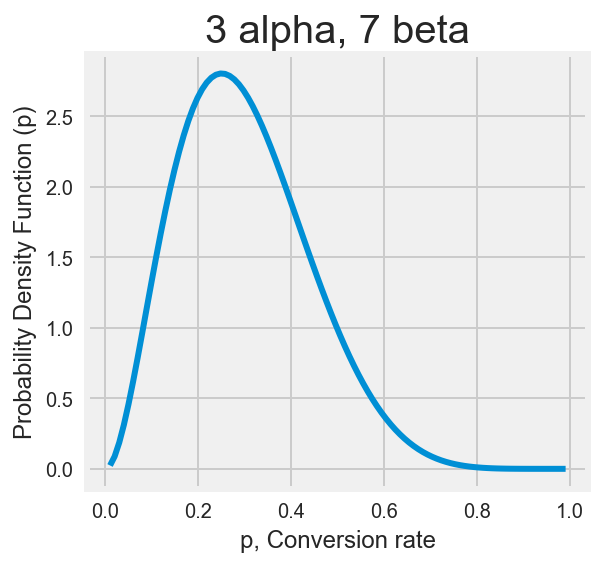

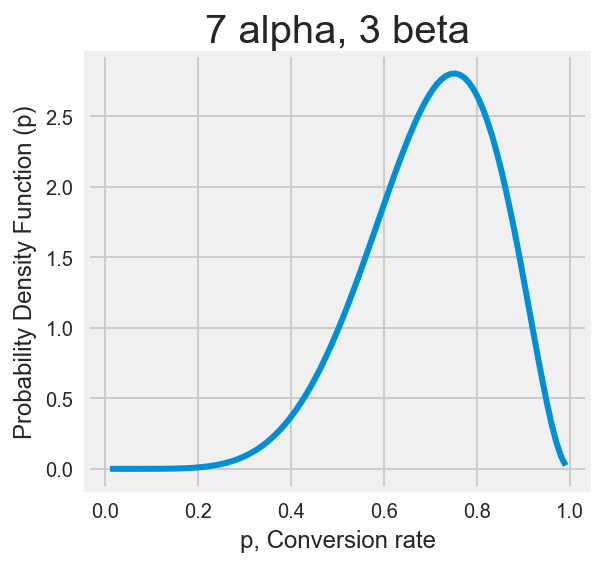

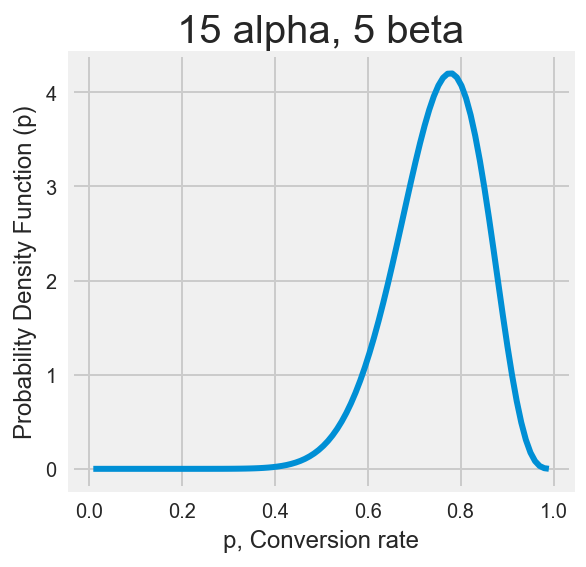

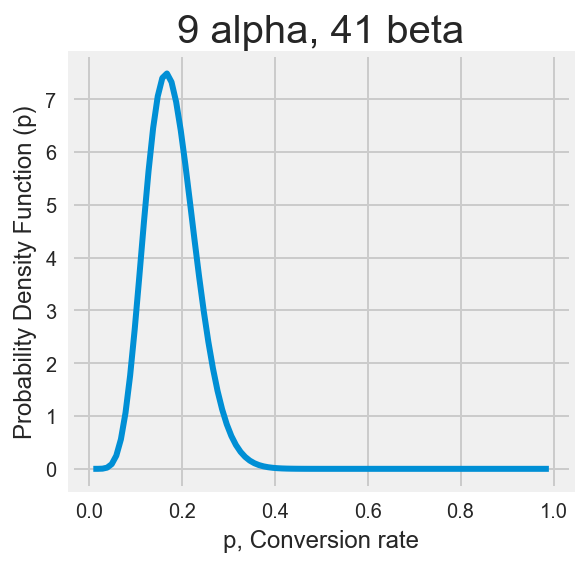

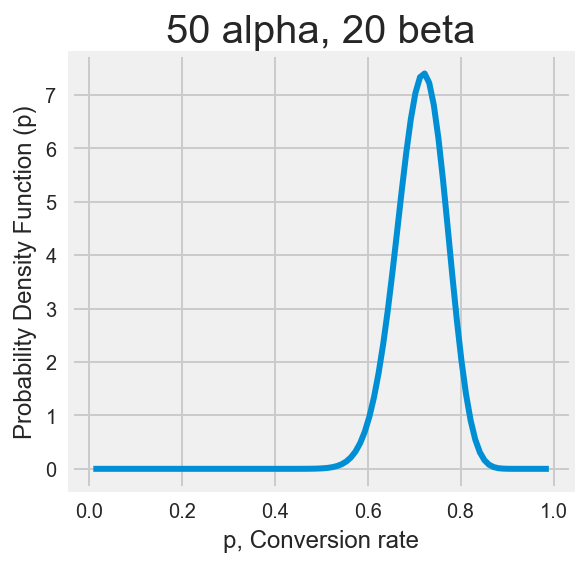

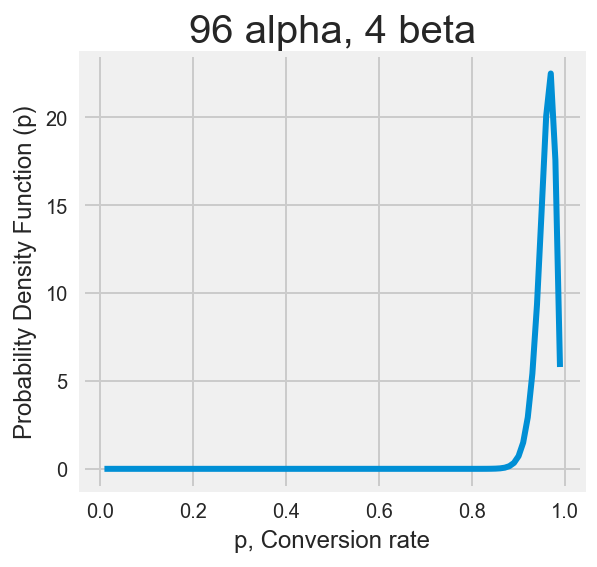

In [27]:
for a,b in alpha_beta:
    plot_beta(probability_range, a,b)

## Review: the Beta as a "conjugate prior"

---

The beta distribution is a **conjugate prior** for the binomial (and the beta) distributions. What does this mean?

Take the calculation of the posterior distribution with a binomial likelihood function (any binary outcome data):

### $$\text{beta posterior} = \text{binomial likelihood} \cdot \text{beta prior}$$

**The Beta distribution being a "conjugate prior" of the Binomial likelihood guarantees that the posterior distribution will also be a Beta distribution.**

> **Note:** Conjugate priors are extremely useful for calculating posteriors directly. Unfortunately, in many modeling scenarios we do not have the convenience of a conjugate prior. This is where methods like Markov Chain Monte Carlo (MCMC) will come into play down the line.

## Bayesian analysis of batting averages

---

Load in the simple batting avergage data for players below. There are just four fields in the dataset: the player's name, their times at bat, their hits, and their batting average.

> *Note: [This section of the lab is a partial replication of this exercise in R, if you're interested.](https://www.r-bloggers.com/understanding-empirical-bayes-estimation-using-baseball-statistics/) But I took out the "empirical bayes" part because it's not technically a "correct" interpretation of Bayesian statistical analysis.*

In [28]:
# A:
career_hits = pd.read_csv('./datasets/career_hits.csv')
career_hits.head()

,name,hits,at_bat,average
0,Hank Aaron,3771,12364,0.304998
1,Tommie Aaron,216,944,0.228814
2,Andy Abad,2,21,0.095238
3,John Abadie,11,49,0.224490
4,Ed Abbaticchio,772,3044,0.253614


In [29]:
career_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 4 columns):
name       9429 non-null object
hits       9429 non-null int64
at_bat     9429 non-null int64
average    9429 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 294.7+ KB


In [30]:
career_hits.describe()

,hits,at_bat,average
count,9429.00000,9429.000000,9429.000000
mean,341.55605,1280.125040,0.224995
std,550.01369,1956.563564,0.091421
min,0.00000,1.000000,0.000000
25%,8.00000,41.000000,0.200000
50%,70.00000,306.000000,0.241803
75%,438.00000,1719.000000,0.266667
max,4256.00000,14053.000000,1.000000


### 4. Find the top and bottom 3 hitters according to their average.

What is wrong with using the average to find the 3 best and 3 worst hitters?

In [36]:
# A:
career_hits.sort_values('average', ascending=False).head(3)

,name,hits,at_bat,average
5853,John Mohardt,1,1,1.0
9303,Al Wright,1,1,1.0
359,Jeff Banister,1,1,1.0


In [37]:
career_hits.sort_values('average', ascending=False).tail(3)

,name,hits,at_bat,average
988,Robert Brown,0,9,0.0
1774,Pete Cote,0,1,0.0
2717,John Flannery,0,2,0.0


In [ ]:
# The average is not good because there are some very low values for times at bat, which doesn't give a clear 
# picture for all players - if they got a hit the one time they were at bat, they get a perfect average.

### 5. Set up a prior distribution to represent our belief about batting average

[After doing a quick search online](https://www.google.com/search?q=average+batting+average+for+players+mlb&oq=average+batting+average+for+players+mlb&aqs=chrome..69i57j0.7373j0j4&sourceid=chrome&ie=UTF-8), it looks like the overall batting average for MLB baseball players is around 0.260.

**Let's make it simple and say that our prior belief is: out of 100 at-bats we have seen 26 hits. Set up a beta distribution with `alpha=27` and `beta=75`. Plot it with the function from above.**

This is our distribution of beliefs on the batting average (probability of hit while at-bat) for MLB players.

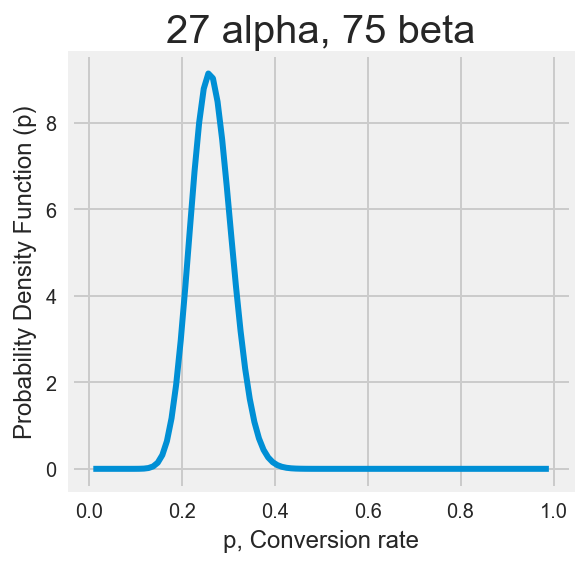

In [38]:
# A:
a = 27
b = 75
plot_beta(probability_range, a, b)

### 6. Calculate the Maximum A Posteriori (MAP) estimate of players' batting averages

The Maximum A Posteriori (MAP) estimate is the mode of a posterior distribution for a statistical parameter.

In our case, the MAP estimate for our players' batting averages will be the mode of the posterior Beta distribution we get from updating our prior distribution with their at-bats and hits.

---

> *Note: For an additional overview of the math behind updating the Beta distribution posterior and conjugate priors ([see this website](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)).*

We need to update our beta distribution prior belief about batting averages with a player's at-bat and hit information to give us a _new_ beta posterior distribution for that player's batting average. 

Luckily, with the beta distribution the update is just a matter of adding in our new observations to the alpha and beta parameters of the distribution, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits+1, prior_misses+1)
    beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
    
> **Note:** This process will also be useful in the context of A/B testing, which we will look at later on.

For each player, update the prior to the posterior distribution and calculate the mode of the distribution. The mode of a beta distribution is conveniently defined:

### $$ \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even really need to use scipy's beta distribution function at all. Just calculate the new alpha (hits) and beta (misses) for each player's posterior beta distribution and plug them into the formula above to get the MAP estimate of batting average.

In [39]:
# A:
prior_hits = 27
prior_misses = 75

In [40]:
career_hits['MAP'] = list(map(lambda a,b: (float(prior_hits + a - 1) / 
                                           (prior_hits + prior_misses + a + (b - a) - 2)),
                              career_hits['hits'].values, career_hits['at_bat'].values))

In [41]:
career_hits.head()

,name,hits,at_bat,average,MAP
0,Hank Aaron,3771,12364,0.304998,0.304637
1,Tommie Aaron,216,944,0.228814,0.231801
2,Andy Abad,2,21,0.095238,0.231405
3,John Abadie,11,49,0.224490,0.248322
4,Ed Abbaticchio,772,3044,0.253614,0.253817


### 7. Look up the top and bottom batters according to the MAP estimate

In [44]:
# A:
career_hits.sort_values('MAP', ascending=False).head()

,name,hits,at_bat,average,MAP
3938,Rogers Hornsby,2930,8173,0.358497,0.357307
4118,Shoeless Joe Jackson,1772,4981,0.355752,0.353867
2109,Ed Delahanty,2596,7505,0.345903,0.344773
3475,Billy Hamilton,2158,6268,0.344288,0.342965
3663,Harry Heilmann,2660,7787,0.341595,0.340560


In [45]:
career_hits.sort_values('MAP', ascending=False).tail()

,name,hits,at_bat,average,MAP
598,Bill Bergen,516,3028,0.170410,0.173274
3113,Buck Gladmon,56,380,0.147368,0.170833
2987,Ed Gastfield,6,88,0.068182,0.170213
4322,Mike Jordan,12,125,0.096000,0.168889
4031,John Humphries,52,364,0.142857,0.168103


### 8. Plot the MLE batting average against the MAP batting average

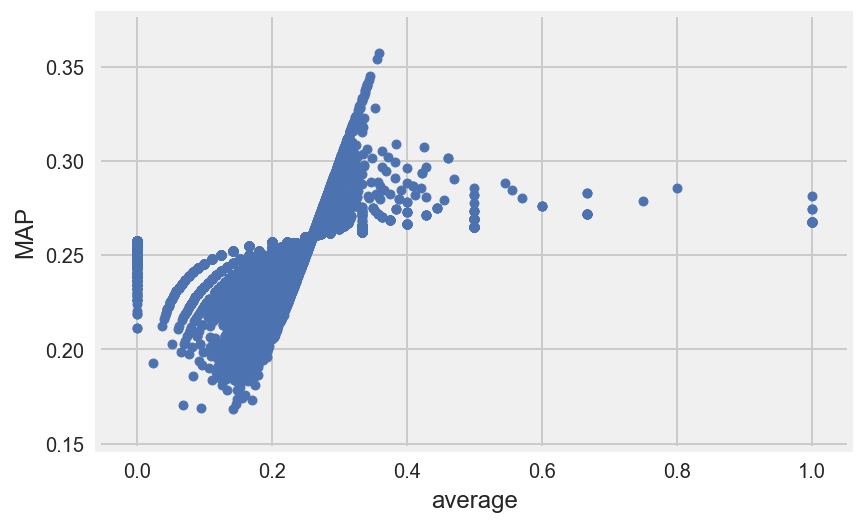

In [48]:
# A:
career_hits.plot(x='average', y='MAP', kind='scatter')